In [350]:
import numpy
import matplotlib
import scipy
import pylab
matplotlib.style.use('classic')
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})


In [351]:
import scipy.special as spec
import scipy.optimize as opt
from scipy import stats

In [430]:
# 3sig discovery potential - the true signal that will be found at 3sigma 50% of the time.
#  all functions implemented as per https://arxiv.org/pdf/1705.02996v3.pdf Appendix B

def CDFPoisson(C,mu):
    return spec.gammainc(C+1,mu)

def C3Sig(B,sigthresh=0.9974):
    if(B>0.0027):
        ToSolve=lambda x:CDFPoisson(x,B)-((1.-sigthresh))
        return opt.brentq(ToSolve,0,1000)
    else:
        return 0.
    
def S3Sig(B):
    C3=C3Sig(B)
    ToSolve=lambda x:CDFPoisson(C3,B+x)-0.5
    return opt.brentq(ToSolve,0,1000)

def T3sig(Mass,Time, IsotopeMass, B):
    NA=6.02e23
    return numpy.log(2)*NA*1e6*Mass*Time/(IsotopeMass*S3Sig(B*Time))

def ROIOpt(b):
    b=b*5/2.35
    a0=-0.40
    a1=-0.29
    a2=-0.039
    return (2.8+pow(10,(a0+a1*numpy.log10(b)+a2*numpy.log10(2.*b))))/2.35

def EfficInROIOpt(b):
    roiedge=ROIOpt(b)/2.
    return 1.-spec.erfc(2.35*roiedge/(numpy.sqrt(2.)))

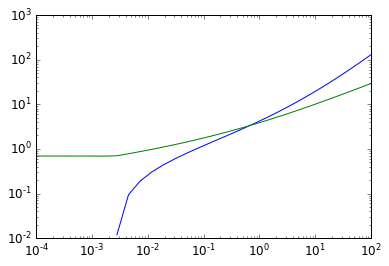

In [431]:
# Check em out
vars=numpy.logspace(-4,2,30)
c3s=[]
for v in vars:
    c3s.append(C3Sig(v))
pylab.loglog(vars,c3s)

vars=numpy.logspace(-4,2,30)
s3s=[]
for v in vars:
    s3s.append(S3Sig(v))
pylab.loglog(vars,s3s)



In [540]:
# 90% CL sensitivity - the 90CL limit set by signal-free experiments 50% of the time

def MedianBackground(B):
    ToSolve=lambda x:CDFPoisson(x,B)-0.5
    if(ToSolve(0)<0.):
        return 0
    else:
        return opt.brentq(ToSolve,0,1000)

def MedianSensitivityS(B,cl):
    bkg=MedianBackground(B)
    ToSolve=lambda x:CDFPoisson(bkg,B+x)-cl
    return opt.brentq(ToSolve,0,10000)

def T90Cl(Mass,Time, IsotopeMass, B):
    NA=6.02e23
    return numpy.log(2)*NA*1e6*Mass*Time/(IsotopeMass*MedianSensitivityS(B*Time,0.9))


In [541]:
cols=['blue','black','DarkRed']

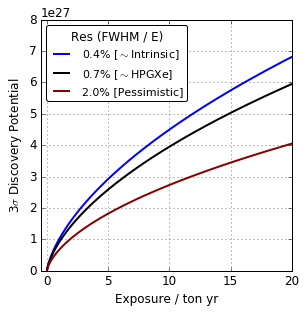

In [542]:
vars=numpy.logspace(-2,1.5,100)
pylab.figure(figsize=(4.5,4.5))
Bs=[0.10,0.14,0.35]
Labels=["0.4% [$\sim$Intrinsic]","0.7% [$\sim$HPGXe]","2.0% [Pessimistic]"]
for bi in range(0,len(Bs)):
    b=Bs[bi]
    sens=[]
    for v in vars:
        sens.append(T(1.,v*EfficInROIOpt(b),196,b*ROIOpt(b)))
    pylab.plot(vars,sens,label=Labels[bi],color=cols[bi],linewidth=2)
   
pylab.legend(loc='upper left',fontsize=11,title='Res (FWHM / E)',fancybox=True)
pylab.xlabel("Exposure / ton yr")
pylab.ylabel(r"3$\sigma$ Discovery Potential")
pylab.xlim(-0.5,20)
pylab.ylim(0,8e27)
pylab.grid(which='both')
pylab.savefig("DiscoveryPotentialSeF6.png",dpi=200)

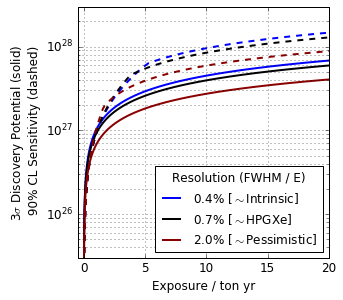

In [543]:
vars=numpy.logspace(-2,1.5,100)
pylab.figure(figsize=(4.5,4.5))
Bs=[0.10,0.14,0.35]
Labels=["0.4% [$\sim$Intrinsic]","0.7% [$\sim$HPGXe]","2.0% [$\sim$Pessimistic]"]
for bi in range(0,len(Bs)):
    b=Bs[bi]
    sens3sig=[]
    sens90cl=[]


    for v in vars:
        sens3sig.append(T3sig(1.,v*EfficInROIOpt(b),196,b*ROIOpt(b)))
        sens90cl.append(T90Cl(1.,v*EfficInROIOpt(b),196,b*ROIOpt(b)))

    pylab.semilogy(vars,sens3sig,color=cols[bi],linewidth=2,label=Labels[bi])
    pylab.semilogy(vars,sens90cl,color=cols[bi],linestyle='--',linewidth=2)
sens3sig=[]
sens90cl=[]


sens=[]
pylab.legend(loc='lower right',fontsize=12,title='Resolution (FWHM / E)')
pylab.xlabel("Exposure / ton yr")
pylab.ylabel("3$\sigma$ Discovery Potential (solid)\n 90% CL Sensitivity (dashed)")
pylab.xlim(-0.5,20)
pylab.ylim(3e25,3e28)
pylab.grid(which='both')
pylab.savefig("SensAndDiscoveryPotentialSeF6.png",dpi=200)

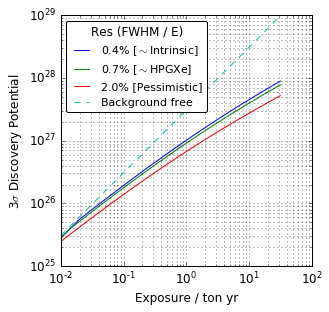

In [544]:
vars=numpy.logspace(-2,1.5,100)
pylab.figure(figsize=(4.5,4.5))
Bs=[0.10,0.14,0.35]
Labels=["0.4% [$\sim$Intrinsic]","0.7% [$\sim$HPGXe]","2.0% [Pessimistic]"]
for bi in range(0,len(Bs)):
    b=Bs[bi]
    sens=[]
    for v in vars:
        sens.append(T(1.,v*EfficInROIOpt(b),196,b*ROIOpt(b)))
    pylab.loglog(vars,sens,label=Labels[bi])
sens=[]
for v in vars:
    sens.append(T(1.,v,196,0.000001))
pylab.plot(vars,sens,'--',label="Background free")     
pylab.legend(loc='upper left',fontsize=11,title='Res (FWHM / E)',fancybox=True)
pylab.xlabel("Exposure / ton yr")
pylab.ylabel(r"3$\sigma$ Discovery Potential")
#pylab.xlim(-0.5,20)
#pylab.ylim(0,8e27)
pylab.grid(which='both')

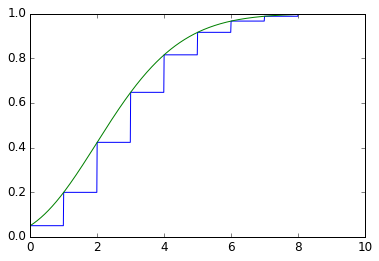

In [535]:
vars=numpy.arange(0,10,0.01)
Mean=3
pylab.plot(vars,stats.poisson.cdf(vars,Mean))
pylab.plot(vars,1.-CDFPoisson(vars,Mean))
pylab.xlim(0,10)
pylab.show()

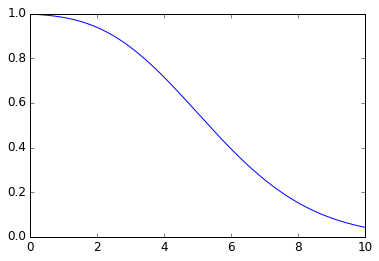

In [539]:
pylab.plot(vars,CDFPoisson(vars,6))



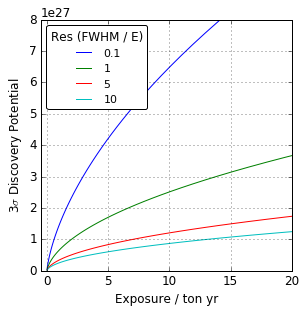

In [518]:
vars=numpy.logspace(-2,1.5,100)
pylab.figure(figsize=(4.5,4.5))
Bs=[0.1,1,5,10]
Labels=[0.1,1,5,10]
for bi in range(0,len(Bs)):
    b=Bs[bi]
    sens=[]
    for v in vars:
        sens.append(T(1.,v*EfficInROIOpt(b),136,b*ROIOpt(b)))
    pylab.plot(vars,sens,label=Labels[bi])
   
pylab.legend(loc='upper left',fontsize=11,title='Res (FWHM / E)',fancybox=True)
pylab.xlabel("Exposure / ton yr")
pylab.ylabel(r"3$\sigma$ Discovery Potential")
pylab.xlim(-0.5,20)
pylab.ylim(0,8e27)
pylab.grid(which='both')